# FrameWorks

In [45]:
#lib para datas e horas
import datetime
from logging import warning
#lib para o sistema operacional
import os
import platform
import win32com.client as win32
#Lib para conexao
import requests
import socket
#Ignorar Avisos
import warnings
warnings.filterwarnings('ignore')
#Lib para API Yahoo Finance
import yfinance as yf
from pandas_datareader import data as web
#lib para dados
import pandas as pd
#lib para visualização
import matplotlib.pyplot as plt
#lib para SQL
import sqlite3


# Rotinas Iniciais


In [46]:
Routine_Id = 1
Routine_Name = 'Fluxo de dados - corretora'

# Quero indetificar o usuário do sistema

def user_identify():

    User = os.environ.get('UserName')
    User_machine = platform.node() #Identificar a maquina do usuário
    User_so = platform.platform() #Identificar o sistema operacional

    
    return( User, User_machine, User_so)  #Retorno da função



def routine_Start(): #Identicar o inicio
    
    StartDate =datetime.datetime.today().date() #Data de inicio
    
    StartHours = datetime.datetime.now() #Hora de inicio

    return (StartDate, StartHours)

def routine_finished():
    FinishedDate =datetime.datetime.today().date() #Data de termino
    
    FinishedHours = datetime.datetime.now() #Hora de termino

    return (FinishedDate, FinishedHours)



def connection_verify(): # Verificando conexão com internet
    Url = 'https://www.prontmed.com' #Conexão
    Timeout = 5 #Tempo de conexão
    try:
        requests.get(Url, timeout=Timeout) # Função para testar conexão
        return True

    except:
        return False


def identify_IP(): #Identiifcando o IP local do usuário
    try:
        Local_IP = socket.gethostbyname( socket.gethostname()) 
        return Local_IP

    except:
        return False

#Gerando os parametros
list_user = user_identify()
list_routine_start = routine_Start()
list_routine_finished = routine_finished()
Internet_connection = connection_verify()
user_local_ip = identify_IP()

#Colocar todos o erros que acontecer no processo
Erro_Operacional = ''

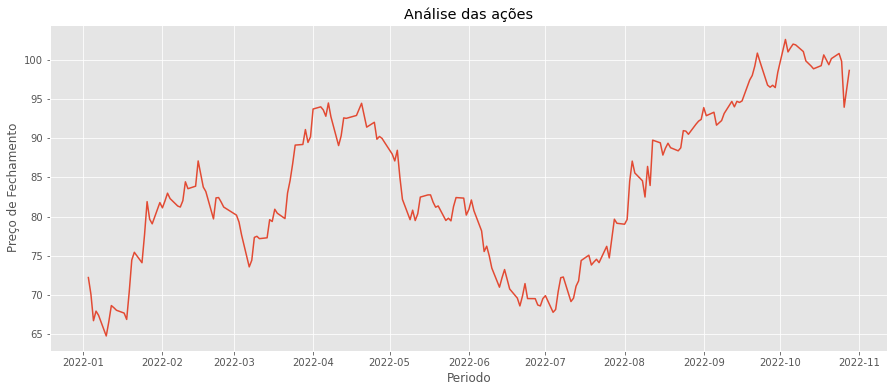

In [47]:
# Operacional
try:
    
    # Pegando os dados
    Base_Dados = web.get_data_yahoo('ARZZ3.SA', start='01-01-2022')
    Eixo_Plot = Base_Dados['Close']
    
    # Plot Gráfico
    
    # Tamanho
    plt.figure( figsize=(15, 6) )
    
    # Estilo
    plt.style.use('ggplot')
    
    # Plot do gráfico
    plt.plot( Eixo_Plot )
    
    # Labels, Titulos
    plt.title('Análise das ações')
    plt.xlabel('Periodo')
    plt.ylabel('Preço de Fechamento')
    
    # Exportar
    plt.savefig('Indicador_Ações.png')
    
except:
    Erro_Operacional = 'Erro_Execução'


# Operacional


In [48]:
# Organização
dictionary = {
    'Routine_Id': Routine_Id,
    'Routine_Name': Routine_Name,
    'User': list_user[0],
    'User_Machine': list_user[1],
    'User_Operation_System': list_user[2],
    'StartDate': list_routine_start[0],
    'StartHours': list_routine_start[1],
    'Internet_Connection': Internet_connection,
    'User_local_IP': user_local_ip,
    'FinishedDate': list_routine_finished[0],
    'FinishedHours':list_routine_finished[1],
    'Execution_Time': (list_routine_finished[1] - list_routine_start[1]),
    'Erro': Erro_Operacional
}

Audit_log = pd.DataFrame(dictionary, index=[0]) # Transformando a lista em DataFrame

# Fazer conexao

Conexao =sqlite3.connect('Banco_Dados.db')
Cursor = Conexao.cursor()

Audit_log.to_sql(
    #Nome da tabela
    'Tabela_Processamento',
    Conexao,
    if_exists= 'append',
    #Ignore Index
    index=False
)


In [49]:
pd.read_sql(
    #Query
    'SELECT * FROM Tabela_Processamento',
    #Conexao
    Conexao
)

,Routine_Id,Routine_Name,User,User_Machine,User_Operation_System,StartDate,StartHours,Internet_Connection,User_local_IP,FinishedDate,FinishedHours,Execution_Time,Erro
0,1,Fluxo de dados - corretora,wande,DESKTOP-DTCOJIE,Windows-10-10.0.19044-SP0,2022-10-29,2022-10-29 19:35:24.049206,1,10.0.0.114,2022-10-29,2022-10-29 19:35:24.049206,0,Erro Operacional
1,1,Fluxo de dados - corretora,wande,DESKTOP-DTCOJIE,Windows-10-10.0.19044-SP0,2022-10-29,2022-10-29 20:28:20.684623,1,10.0.0.114,2022-10-29,2022-10-29 20:28:20.684623,0,
